In [1]:
import csv
import copy
import numpy as np
from itertools import groupby
from operator import itemgetter
from operator import itemgetter
import networkx as nx
import random
import itertools
from itertools import chain
import statistics
import multiprocess
from statistics import mean, stdev, median
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import plotly.graph_objects as go
from networkx import Graph
from networkx import connected_components
from scipy.optimize import curve_fit
import collections
from math import *
import import_ipynb
from import_data import get_data_from_csv
from explore_data import *

importing Jupyter notebook from import_data.ipynb
importing Jupyter notebook from explore_data.ipynb


In [2]:
sns.set_theme(style="darkgrid")

In [3]:
big_likes, big_users, big_items, big_user_items, big_item_users = get_data_from_csv('../data/users_bipartite_aligned_artist_1000000.csv')
print('\nNumber or users:', len(big_users))
print('\nNumber or artists:', len(big_items))

Data was imported with success.

Number or users: 658782

Number or artists: 271039


In [ ]:
# Info table
info_table = info_table(big_user_items, big_item_users)
fig = go.Figure(data=[go.Table(header=dict(values=['metric', 'favourite artists per user', 'fans per artist']),
                 cells=dict(values=info_table))])
fig.show()

In [4]:
# Number of users who have liked x number of artists
nb_users_per_nb_items = distribution(big_user_items)
# Number of artists that have been liked by x number of users
nb_items_per_nb_users = distribution(big_item_users)

/Library/Python/3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


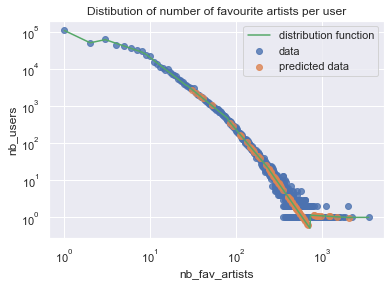

In [5]:
# Distibution of number of favourite artists per user
title = 'Distibution of number of favourite artists per user'
x_axe = 'nb_fav_artists'
y_axe = 'nb_users'

# Define training and test datasets
test_data = random.sample(nb_users_per_nb_items.keys(), k=int(len(nb_users_per_nb_items)/10))
training_data = {k: v for k, v in nb_users_per_nb_items.items() if k not in test_data}
training_df = pd.DataFrame(data={x_axe: list(training_data.keys()), 
                                 y_axe: list(training_data.values())})

# Fit training data
fitted_df, coefs = fit_data(training_data, x_axe, y_axe, fit_func=log_fit, n=3)

# Predict on test data
predicted_df = predict_data(test_data, coefs, x_axe, y_axe, fit_func=log_fit, n=3)

# Plot results
plot_data_prediction_fit(training_df, fitted_df, predicted_df, 
                         title, x_axe, y_axe, scale='log')

/Library/Python/3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


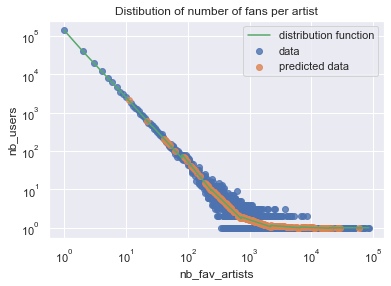

In [6]:
# Distibution of number of fans per artist
title = 'Distibution of number of fans per artist'
x_axe = 'nb_fav_artists'
y_axe = 'nb_users'

# Define training and test datasets
test_data = random.sample(nb_items_per_nb_users.keys(), k=int(len(nb_items_per_nb_users)/10))
training_data = {k: v for k, v in nb_items_per_nb_users.items() if k not in test_data}
training_df = pd.DataFrame(data={x_axe: list(training_data.keys()), 
                                 y_axe: list(training_data.values())})

# Fit training data
fitted_df, coefs = fit_data(training_data, x_axe, y_axe, fit_func=log_fit, n=3)

# Predict on test data
predicted_df = predict_data(test_data, coefs, x_axe, y_axe, fit_func=log_fit, n=3)

# Plot results
plot_data_prediction_fit(training_df, fitted_df, predicted_df, 
                         title, x_axe, y_axe, scale='log')